In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
print(gpus)
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)
    
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
     try:
         for gpu in gpus:
             tf.config.experimental.set_memory_growth(gpu, True)
     except RuntimeError as e:
         print(e)


#### CiFar - 100


In [ ]:
cifar= tf.keras.datasets.cifar100
classes = [ "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle", "bowl", "boy", "bridge",
           "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle", "chair","chimpanzee","clock", "cloud", "cockroach",
           "couch", "crab", "crocodile", "cup", "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster",
           "house", "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree",
           "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear",
           "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray",
           "road", "rocket", "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake",
           "spider", "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone",
           "television", "tiger", "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale",
           "willow_tree", "wolf", "woman", "worm" ]

#### CiFar - 10


In [ ]:
# cifar= tf.keras.datasets.cifar10
# classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
train_images,val_images,train_labels,val_labels = train_test_split(train_images, train_labels, test_size = 0.2)

train_labels = train_labels.reshape(-1,)
val_labels = val_labels.reshape(-1,)
test_labels = test_labels.reshape(-1,)


for i in range(6):
  plt.subplot(2,3,i+1)
  plt.title(classes[train_labels[i]])
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print("Training")
print(train_images.shape)
print(train_labels.shape)
print("Validation")
print(val_images.shape)
print(val_labels.shape)
print("Test")
print(test_images.shape)
print(test_labels.shape)



### Hyperparameters 

In [9]:
epochs=10
batchSize=64
stride=1
kernel_size=(3,3)
no_of_filters=64
pooling='avg'
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
lr=0.001
optim = tf.keras.optimizers.Adam(learning_rate=lr)
metrics = ['accuracy']
activation='relu'

 
 

---


  ### Pretrained Model







In [10]:
vgg16t_model = tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape = (224,224,3),
    classes=100,
    classifier_activation="relu",
)

for layer in vgg16t_model.layers:
        layer.trainable=False 
        
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.UpSampling2D(size=(7, 7),interpolation='bilinear'))
model.add(vgg16t_model)
model.add(tf.keras.layers.Conv2D(no_of_filters,kernel_size,activation=activation))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dropout(0.025))
model.add(tf.keras.layers.Dense(no_of_filters, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='softmax'))


#### Train here


In [11]:
model.compile(loss=loss,optimizer=optim,metrics=metrics)
result=model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,validation_data = (val_images, val_labels))


Epoch 1/10
625/625 [==============================] - 205s 327ms/step - loss: 2.8627 - accuracy: 0.3296 - val_loss: 2.2414 - val_accuracy: 0.4452
Epoch 2/10
625/625 [==============================] - 202s 323ms/step - loss: 1.7993 - accuracy: 0.5216 - val_loss: 1.8125 - val_accuracy: 0.5068
Epoch 3/10
625/625 [==============================] - 202s 323ms/step - loss: 1.4427 - accuracy: 0.5970 - val_loss: 1.7506 - val_accuracy: 0.5288
Epoch 4/10
625/625 [==============================] - 202s 323ms/step - loss: 1.1993 - accuracy: 0.6558 - val_loss: 1.8510 - val_accuracy: 0.5153
Epoch 5/10
625/625 [==============================] - 202s 323ms/step - loss: 1.0065 - accuracy: 0.7078 - val_loss: 1.8682 - val_accuracy: 0.5216
Epoch 6/10
625/625 [==============================] - 205s 329ms/step - loss: 0.8512 - accuracy: 0.7464 - val_loss: 1.8893 - val_accuracy: 0.5296
Epoch 7/10
625/625 [==============================] - 209s 334ms/step - loss: 0.7181 - accuracy: 0.7844 - val_loss: 2.0360 -

In [12]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

157/157 [==============================] - 41s 258ms/step - loss: 2.3383 - accuracy: 0.5071
Accuracy :  0.507099986076355


### Predicting 

7/7 [==============================] - 5s 368ms/step
16
Prediction :  can
Actual     :  can


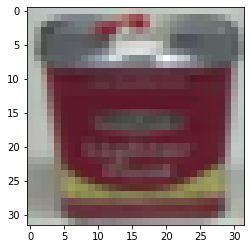

In [13]:
cnt =random.randint(100)
tempArr=[]
predictions=model.predict(test_images[:200])

pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print(label0)
print("Prediction : ",classes[label0])
print("Actual     : ",classes[test_labels[cnt]])


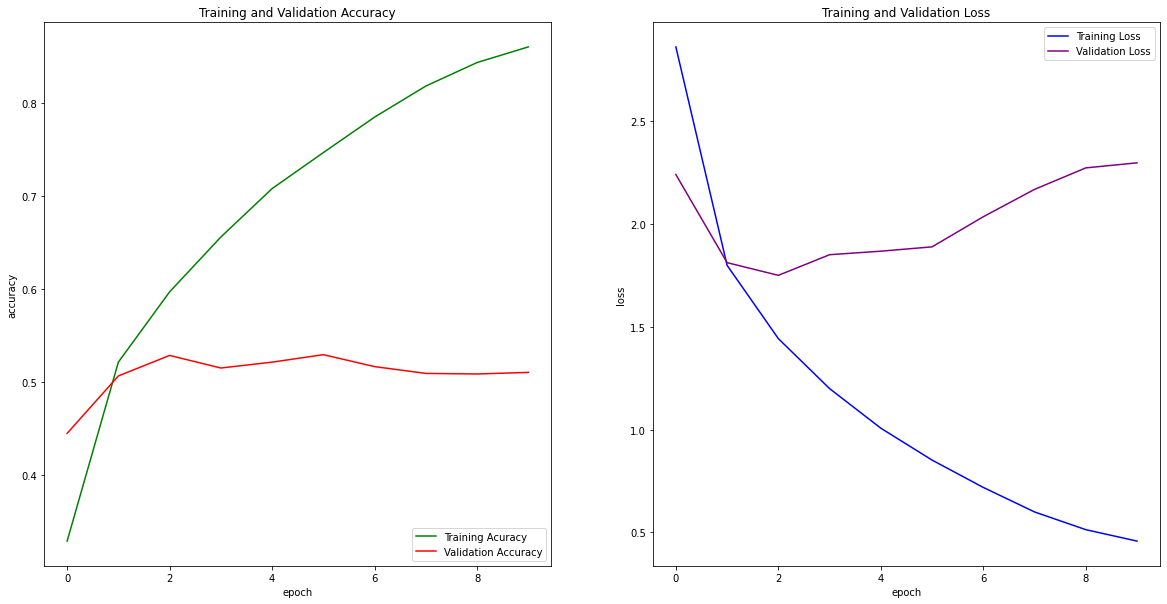

In [14]:
acc = result.history['accuracy']
val_acc = result.history['val_accuracy']
loss = result.history['loss']
val_loss = result.history['val_loss']

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.title("Training and Validation Accuracy")
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(loss,color = 'blue',label = 'Training Loss')
plt.plot(val_loss,color = 'purple',label = 'Validation Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()




313/313 [==============================] - 40s 128ms/step


<AxesSubplot:>

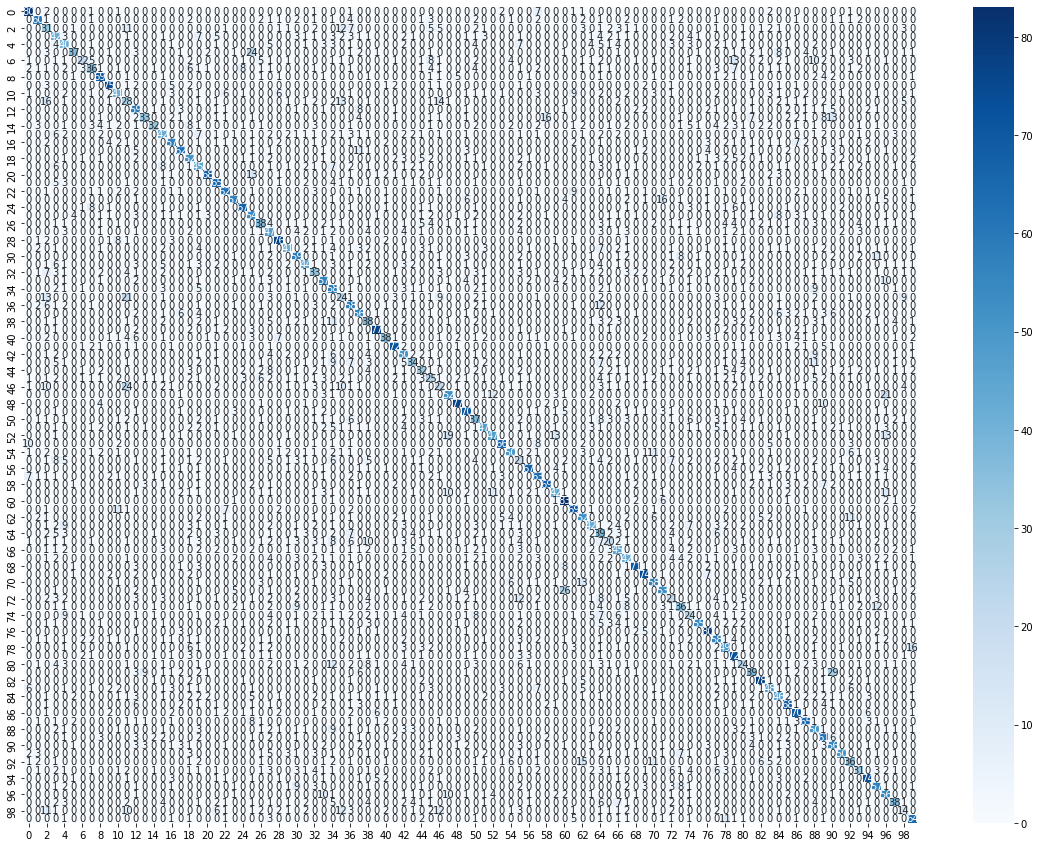

In [15]:
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()
y_pred = np.argmax(model.predict(test_images), axis=1)

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=range(100), index=range(100))
plt.figure(figsize=(20,15))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")